# Setup
---

In [ ]:
import os
import glob
import json
import collections
import multiprocessing

import nltk
import seaborn as sns
from tqdm import tqdm

from valerie.utils import split_sentences
from valerie.data import Article, Claim

In [2]:
sns.set(rc={'figure.figsize':(16/1.5,9/1.5)})

# Load Data
---

In [3]:
with open("data/phase1/all_data/metadata.json") as fi:
    phase1_claims = [Claim(**d) for d in tqdm(json.load(fi))]

with open("data/phase2/all_data/metadata.json") as fi:
    phase2_claims = [Claim(**d) for d in tqdm(json.load(fi))]

100%|██████████| 13130/13130 [00:01<00:00, 9509.56it/s]


In [4]:
phase1_articles_paths = glob.glob("data/phase1/all_data/articles/*.txt")
phase2_articles_paths = glob.glob("data/phase2/all_data/articles/*.html")

In [5]:
def gen_article_phase1(filepath):
    art_id = int(os.path.basename(filepath).split(".")[0])
    with open(filepath) as fi:
        article = Article.from_txt(art_id, fi.read())
#     article.body = split_sentences(article.body)
#     article.title = article.body[0]
    return art_id, article

pool = multiprocessing.Pool(6)
phase1_articles = {}
total = len(phase1_articles_paths)
for art_id, article in tqdm(pool.imap_unordered(gen_article_phase1, phase1_articles_paths), total=total):
    phase1_articles[art_id] = article

100%|██████████| 64974/64974 [02:09<00:00, 503.49it/s]


In [6]:
def gen_article_phase2(filepath):
    art_id = int(os.path.basename(filepath).split(".")[0])
    with open(filepath) as fi:
        article = Article.from_html(art_id, fi.read())
#     article.body = split_sentences(article.body)
    return art_id, article

pool = multiprocessing.Pool(6)
phase2_articles = {}
total = len(phase2_articles_paths)
for art_id, article in tqdm(pool.imap_unordered(gen_article_phase2, phase2_articles_paths), total=total):
    phase2_articles[art_id] = article

100%|██████████| 54166/54166 [13:45<00:00, 65.58it/s]


# Anaylsis
---

### Phase 1 Claims

In [7]:
for claim in phase1_claims[:10]:
    print(json.dumps(claim.__dict__, indent=2))

{
  "id": 0,
  "claim": "A line from George Orwell's novel 1984 predicts the power of smartphones.",
  "claimant": "",
  "label": 0,
  "data": "2017-07-17",
  "related_articles": [
    122094,
    122580,
    130685,
    134765
  ],
  "explanation": null,
  "support": null
}
{
  "id": 1,
  "claim": "Maine legislature candidate Leslie Gibson insulted Parkland shooting survivor and activist Emma Gonzalez via Twitter.",
  "claimant": "",
  "label": 2,
  "data": "2018-03-17",
  "related_articles": [
    106868,
    127320,
    128060
  ],
  "explanation": null,
  "support": null
}
{
  "id": 4,
  "claim": "A 17-year-old girl named Alyssa Carson is being trained by NASA to become an astronaut.",
  "claimant": "",
  "label": 1,
  "data": "2018-07-18",
  "related_articles": [
    132130,
    132132,
    149722
  ],
  "explanation": null,
  "support": null
}
{
  "id": 5,
  "claim": "In 1988 author Roald Dahl penned an open letter urging parents to have their children vaccinated against measles.

In [8]:
lengths1 = [len(nltk.tokenize.word_tokenize(claim.claim)) for claim in phase1_claims]

number of claims: 15555
labels distribution: [(0, 7408), (1, 6451), (2, 1696)]
max num words in a claim: 1882
avg num words in a claim: 27.923947283831566
less than 128: 0.9881067180970748


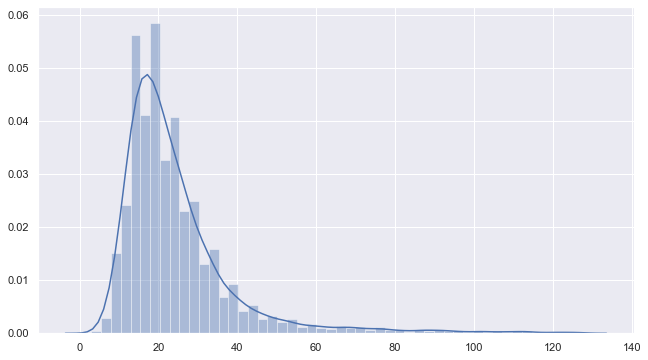

In [9]:
print("number of claims:", len(phase1_claims))
print("labels distribution:", collections.Counter([claim.label for claim in phase1_claims]).most_common())
print("max num words in a claim:", max(lengths1))
print("avg num words in a claim:", sum(lengths1)/len(lengths1))
print("less than 128:", len(list(filter(lambda l : l < 128, lengths1))) / len(lengths1))
fig = sns.distplot(list(filter(lambda l : l < 128, lengths1)))

### Phase 2 Claims

In [10]:
for claim in phase2_claims[:10]:
    print(json.dumps(claim.__dict__, indent=2))

{
  "id": 0,
  "claim": "The economic impact of Atlanta's 2000 Super Bowl was $292 million.",
  "claimant": "Atlanta Sports Council",
  "label": 0,
  "data": "2000-10-01 00:00:00",
  "related_articles": {
    "train_articles/80022.html": "http://www.dallasnews.com/sharedcontent/dws/news/localnews/cowboysstadium/stories/DN-superecoimpact_27met.ART.State.Edition1.4c2850a.html",
    "train_articles/80023.html": "http://www.nfl.com/superbowl/history/recap/sbxxxiv"
  },
  "explanation": null,
  "support": null
}
{
  "id": 1,
  "claim": "Swabbing ticks with liquid soap is a recommended and effective method for removing them.",
  "claimant": "",
  "label": 1,
  "data": "2006-07-03 00:00:00+00:00",
  "related_articles": {
    "train_articles/3981.html": "http://www.eurosurveillance.org/ViewArticle.aspx?ArticleId=3027",
    "train_articles/3982.html": "http://www.cdc.gov/ticks/removing_a_tick.html",
    "train_articles/3983.html": "http://www.nlm.nih.gov/medlineplus/ency/article/007211.htm"
  }

In [11]:
lengths2 = [len(nltk.tokenize.word_tokenize(claim.claim)) for claim in phase2_claims]

number of claims: 13130
labels distribution: [(1, 6782), (0, 4691), (2, 1657)]
max num words in a claim: 165
avg num words in a claim: 23.118050266565117
less than 128: 0.9997715156130997


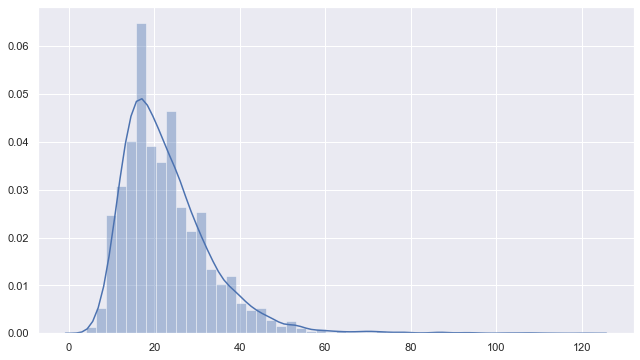

In [12]:
print("number of claims:", len(phase2_claims))
print("labels distribution:", collections.Counter([claim.label for claim in phase2_claims]).most_common())
print("max num words in a claim:", max(lengths2))
print("avg num words in a claim:", sum(lengths2)/len(lengths2))
print("less than 128:", len(list(filter(lambda l : l < 128, lengths2))) / len(lengths2))
fig = sns.distplot(list(filter(lambda l : l < 128, lengths2)))

In [13]:
# instead of splitting each article sentence into words, to save 
# time we find the avg number of chars per word accordinng to the 
# claims data and use that as to estimate of the number of words
# in the article sentences (since they're char lengths are easily 
# found)
char_per_word_avg_1 = sum([len(claim.claim) for claim in phase1_claims]) / sum(lengths1)
char_per_word_avg_2 = sum([len(claim.claim) for claim in phase2_claims]) / sum(lengths2)
char_per_word = (char_per_word_avg_1 + char_per_word_avg_2) / 2
print(char_per_word)

5.020789594922082


### Phase 1 Articles

In [16]:
num_sentences1 = []
num_words1 = []
lengths_articles1 = []
for article in tqdm(phase1_articles.values()):
    split_sents = split_sentences(article.content)
    num_sentences1.append(len(split_sents))
    num_words1.append(int(len(article.content) / char_per_word))
    lengths_articles1.extend([int(len(sent) / char_per_word) for sent in split_sents])

100%|██████████| 64974/64974 [02:24<00:00, 449.96it/s]


In [17]:
print("number of articles:", len(phase1_articles))

number of articles: 64974


In [18]:
# example
phase1_articles[2551].__dict__

{'id': 2551,
 'title': None,
 'content': 'West Virginia Delegates to the Republican National Convention I’ve spent all day trying to compile the list of delegates that are going to the Republican National Convention. With 99 precincts reporting as of 5:39 p.m., I think I’ve got the list down.  Trump won 30 pledged delegates from West Virginia. That’s 88 percent of the delegates in a state where he won 77 percent of the vote. He was guaranteed the three RNC delegates-Conrad Lucas, Melody Potter and Kris Warner-when he won the popular vote.  Trump also won all 9 congressional district delegates. They are:  District 1: Barry Bledsoe, Mary Beth Andreini and Phil Mallow.  District 2 (97 percent reporting): Vic Sprouse, Mike Stuart and Ron Walters.  District 3: Ray Canterbury, Michael Baisden and Mark Maynard  Trump won 18 out of 22 at-large delegates. Two of the uncommitted delegates have verbally pledged their support to Trump, according to Mike Stuart, the co-chair of Donald Trump’s West 

max number of sentences in article: 2438
avg length of sentences in article: 52.87202573337027
less than 256: 0.9646473974205066


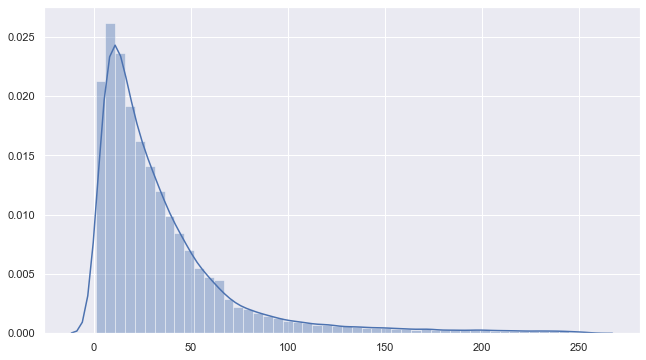

In [28]:
print("max number of sentences in article:", max(num_sentences1))
print("avg length of sentences in article:", sum(num_sentences1)/len(num_sentences1))
print("less than 256:", len(list(filter(lambda l : l < 256, num_sentences1))) / len(num_sentences1))
fig = sns.distplot(list(filter(lambda l : l < 256, num_sentences1)))

max number of words in article: 19957
avg length of words in article: 1402.3678702250131
less than 6400: 0.9637085603472159


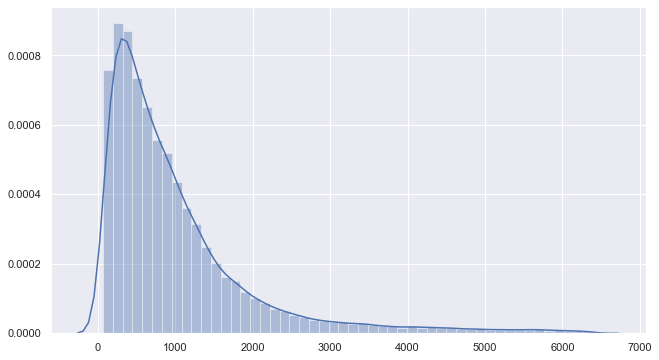

In [29]:
print("max number of words in article:", max(num_words1))
print("avg length of words in article:", sum(num_words1)/len(num_words1))
print("less than 6400:", len(list(filter(lambda l : l < 6400, num_words1))) / len(num_words1))
fig = sns.distplot(list(filter(lambda l : l < 6400, num_words1)))

max length of words in sentence: 19926
avg length of words in sentence: 25.74545710179614
less than 128: 0.9943495588603871


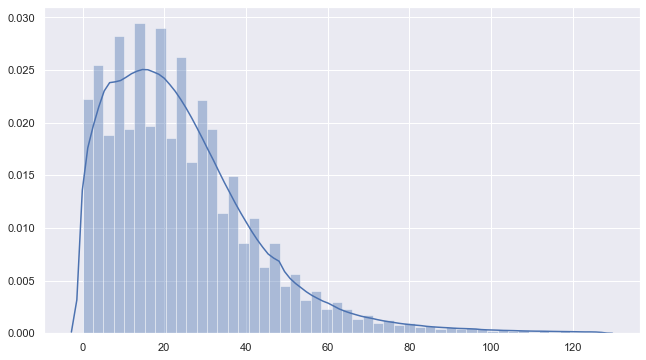

In [30]:
print("max length of words in sentence:", max(lengths_articles1))
print("avg length of words in sentence:", sum(lengths_articles1)/len(lengths_articles1))
print("less than 128:", len(list(filter(lambda l : l < 128, lengths_articles1))) / len(lengths_articles1))
fig = sns.distplot(list(filter(lambda l : l < 128, lengths_articles1)))

### Phase 2 Articles

In [32]:
num_sentences2 = []
num_words2 = []
lengths_articles2 = []
for article in tqdm(phase2_articles.values()):
    split_sents = split_sentences(article.content)
    num_sentences2.append(len(split_sents))
    num_words2.append(int(len(article.content) / char_per_word))
    lengths_articles2.extend([int(len(sent) / char_per_word) for sent in split_sents])

100%|██████████| 54166/54166 [02:18<00:00, 391.33it/s]


In [33]:
titles = [art.title for art in phase2_articles.values() if art.title]
for title in titles[:10]:
    print("example:", title)
print()
title_lengths = [len(nltk.tokenize.word_tokenize(title)) for title in titles]

example: Now All Americans Will Be Microchipped On the Will Of Police : Resolution (H.R.4919) Passed by Senate – Home Newz
example: Malliotakis, Castorina Demand Preservation of IDNYC Documents | Nicole Malliotakis for Mayor
example: Medicare-for-All and Public Plan Buy-In Proposals: Overview and Key Issues | The Henry J. Kaiser Family Foundation
example: MSPP / The Sanger Project / About
example: How cute things hijack our brains and drive behaviour
example: U.S. on guard for attacks ahead of bin Laden anniversary | Reuters
example: California Valley Solar Ranch
example: Border Security and Immigration Reform Act - National Immigration Forum
example: Syrian Catholic priest murdered in his church – but not beheaded, sources say – Telegraph Blogs
example: CIA Chief Panetta: Obama Made ‘Gutsy’ Decision on Bin Laden Raid | PBS NewsHour



ratio of titles to articles: 0.9828859432116087
max number of words in title: 212
avg number of words in title: 12.011833430379985
less than 256: 1.0


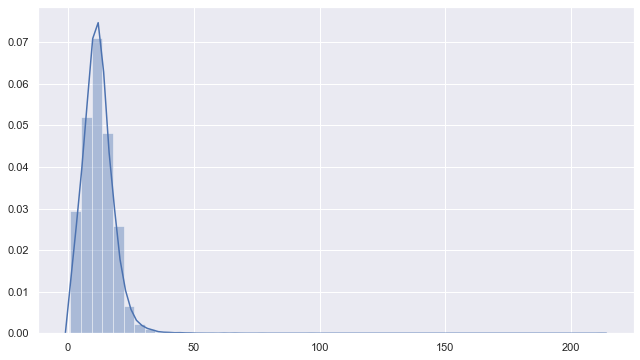

In [34]:
print("ratio of titles to articles:", len(titles)/len(phase2_articles))
print("max number of words in title:", max(title_lengths))
print("avg number of words in title:", sum(title_lengths)/len(title_lengths))
print("less than 256:", len(list(filter(lambda l : l < 256, title_lengths))) / len(title_lengths))
fig = sns.distplot(list(filter(lambda l : l < 256, title_lengths)))

In [35]:
print("number of articles:", len(phase2_articles))

number of articles: 54166


In [36]:
# example
phase2_articles[2551].__dict__

{'id': 2551,
 'title': 'Thabo Mbeki | president of South Africa | Britannica.com',
 'content': 'Our editors will review what you’ve submitted and determine whether to revise the article. ,  (born June 18, 1942, Idutywa, Transkei [now South Africa]), politician who served as the president of Mbeki was early exposed to politics by his father, a longtime leader in the (ANC), an organization dedicated to the elimination of in South Africa, who was later imprisoned (1964–87) with . The younger Mbeki attended schools in Transkei, including the well-known Lovedale secondary school in Alice, and in 1956 joined the ANC Youth League. Three years later he led a student strike at Lovedale that resulted in his expulsion. Mbeki continued his studies at home and remained active in the ANC after it was banned in South Africa in 1960. In 1962 he left South Africa illegally and enrolled at the University of Sussex in Brighton, England, from which he graduated with an M.A. in economics in 1966. In the la

max number of sentences in article: 10332
avg number of sentences in article: 57.631466233430565
less than 128: 0.9182882250858472


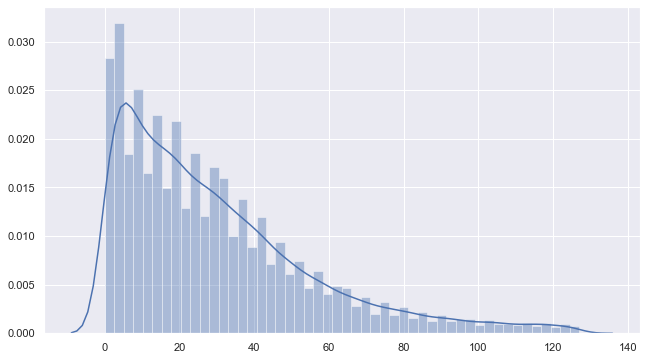

In [37]:
print("max number of sentences in article:", max(num_sentences2))
print("avg number of sentences in article:", sum(num_sentences2)/len(num_sentences2))
print("less than 128:", len(list(filter(lambda l : l < 128, num_sentences2))) / len(num_sentences2))
fig = sns.distplot(list(filter(lambda l : l < 128, num_sentences2)))

max number of words in article: 206008
avg number of words in article: 1491.5047446737806
less than 4096: 0.9319314699257837


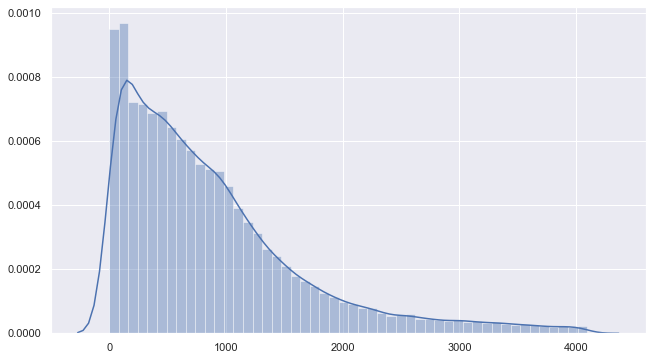

In [38]:
print("max number of words in article:", max(num_words2))
print("avg number of words in article:", sum(num_words2)/len(num_words2))
print("less than 4096:", len(list(filter(lambda l : l < 4096, num_words2))) / len(num_words2))
fig = sns.distplot(list(filter(lambda l : l < 4096, num_words2)))

max length of words in sentence: 14956
avg number of words in sentence: 25.13585854476424
less than 128: 0.9947873987800104


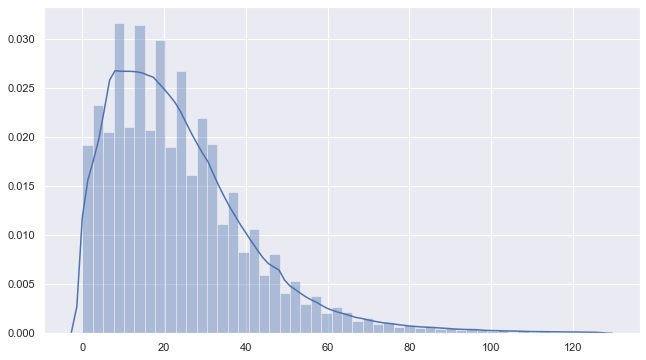

In [39]:
print("max length of words in sentence:", max(lengths_articles2))
print("avg number of words in sentence:", sum(lengths_articles2)/len(lengths_articles2))
print("less than 128:", len(list(filter(lambda l : l < 128, lengths_articles2))) / len(lengths_articles2))
fig = sns.distplot(list(filter(lambda l : l < 128, lengths_articles2)))